In [309]:
import pandas as pd
from matplotlib import pyplot as plt
from hdtree import HDTreeClassifier
from information_measure import EntropyMeasure
from split_rule import LessThanHalfOfSplit, SingleCategorySplit,FixedValueSplit, TwentyQuantileSplit, LogisticRegressionSingleSplit, AbstractQuantileSplit, TwentyQuantileRangeSplit, TwoQuantileRangeSplit, LogisticRegressionDoubleCategorySplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, plot_roc_curve

In [206]:
def runMetrics(trueVal,preds):
  if len(set(trueVal))<=2:
    print('Accuracy = ', accuracy_score(trueVal,preds))
    print('Macro Precision = ', precision_score(trueVal,preds,average='macro'))
    print('Micro Precision = ', precision_score(trueVal,preds,average='micro'))
    print('Weighted Precision = ', precision_score(trueVal,preds,average='weighted'))
    print('Macro Recall = ', recall_score(trueVal,preds,average='macro'))
    print('Micro Recall = ', recall_score(trueVal,preds,average='micro'))
    print('Weighted Recall = ', recall_score(trueVal,preds,average='weighted'))
    print('Macro F1 = ', f1_score(trueVal,preds,average='macro'))
    print('Micro F1 = ', f1_score(trueVal,preds,average='micro'))
    print('Weighted F1 = ', f1_score(trueVal,preds,average='weighted'))
    print('\nClassification Report\n', classification_report(trueVal,preds))
  else:
    print('Accuracy = ', accuracy_score(trueVal,preds))
    print('Macro Precision = ', precision_score(trueVal,preds,average='macro'))
    print('Micro Precision = ', precision_score(trueVal,preds,average='micro'))
    print('Weighted Precision = ', precision_score(trueVal,preds,average='weighted'))
    print('Macro Recall = ', recall_score(trueVal,preds,average='macro'))
    print('Micro Recall = ', recall_score(trueVal,preds,average='micro'))
    print('Weighted Recall = ', recall_score(trueVal,preds,average='weighted'))
    print('Macro F1 = ', f1_score(trueVal,preds,average='macro'))
    print('Micro F1 = ', f1_score(trueVal,preds,average='micro'))
    print('Weighted F1 = ', f1_score(trueVal,preds,average='weighted'))
    print('\nClassification Report\n', classification_report(trueVal,preds))

In [336]:
def getAucRocMetrics(trueVal, probabs, pos_label):
    fpr, tpr, thresholds = roc_curve(trueVal, probabs, pos_label=pos_label)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(trueVal, probabs))
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    auc = roc_auc_score(trueVal, probabs)
    print('AUC = ', auc)

# Dataset 1

## Mean 

In [320]:
train_data = pd.read_csv('../../data/train1mean.csv')
test_data = pd.read_csv('../../data/test1mean.csv')

In [321]:
train_data.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,0.637437,0.073030,...,0.001669,0.003339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.000000,0.002667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.000000,0.200000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [322]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [323]:
train_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,0.637437,0.073030,0.112436,...,0.001669,0.003339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.000000,0.002667,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.000000,0.200000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [324]:
col_names = [*train_data.columns[:]]

In [325]:
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:,:-1], train_data.iloc[:,-1], test_size=0.1, random_state=42)
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [326]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [327]:
X_train = pd.concat([X_train, y_train], axis=1)
X_val = pd.concat([X_val, y_val], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [328]:
treeData1Mean = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=1)

In [329]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((167, 28), (167,), (599, 28), (599,), (67, 28), (67,))

In [330]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_val.values, y_val.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.9699499165275459
0.9402985074626866
0.9520958083832335


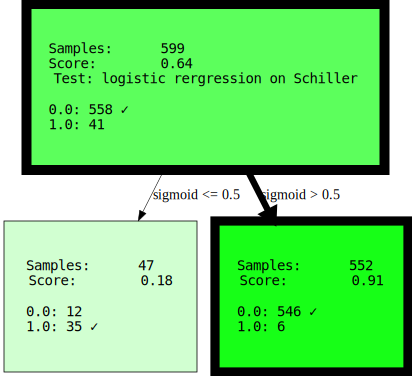

In [331]:
treeData1Mean.generate_dot_graph()

In [332]:
preds = treeData1Mean.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9520958083832335
Macro Precision =  0.7894736842105263
Micro Precision =  0.9520958083832335
Weighted Precision =  0.9722659943271352
Macro Recall =  0.9743589743589743
Micro Recall =  0.9520958083832335
Weighted Recall =  0.9520958083832335
Macro F1 =  0.8535087719298247
Micro F1 =  0.9520958083832335
Weighted F1 =  0.9578527156213887

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       156
         1.0       0.58      1.00      0.73        11

    accuracy                           0.95       167
   macro avg       0.79      0.97      0.85       167
weighted avg       0.97      0.95      0.96       167



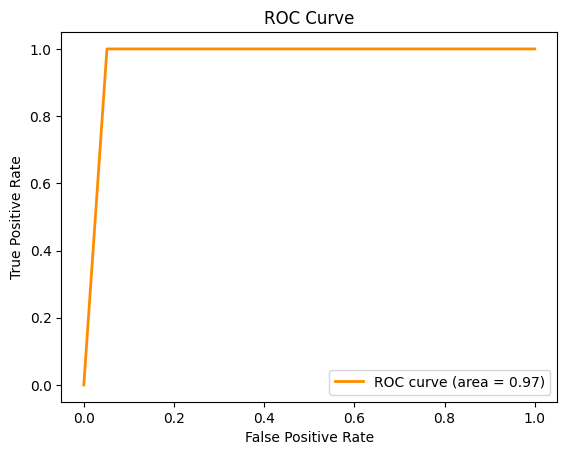

AUC =  0.9743589743589743


In [337]:
getAucRocMetrics(y_test.values, treeData1Mean.predict_proba(X_test.values)[:, 1], 1)

In [338]:
treeData1Mean = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [339]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_val.values, y_val.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.9666110183639399
0.9402985074626866
0.9341317365269461


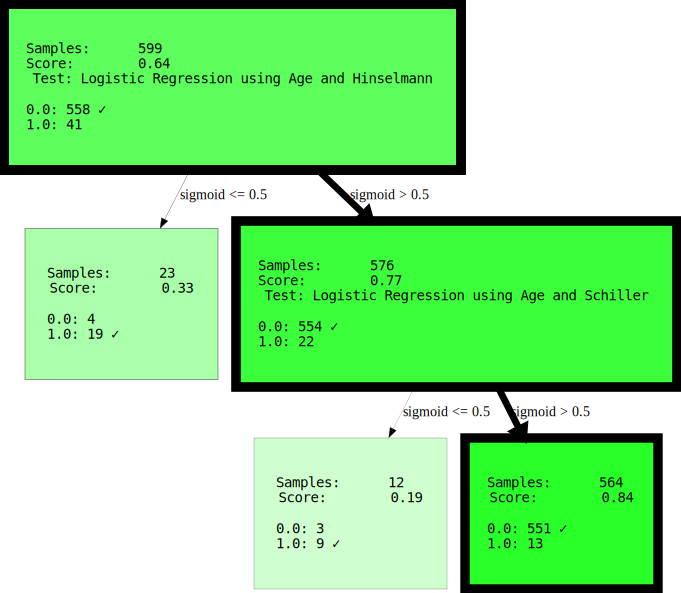

In [340]:
treeData1Mean.generate_dot_graph()

In [341]:
preds = treeData1Mean.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9341317365269461
Macro Precision =  0.7369281045751634
Micro Precision =  0.9341317365269461
Weighted Precision =  0.9426441235176705
Macro Recall =  0.7957459207459208
Micro Recall =  0.9341317365269461
Weighted Recall =  0.9341317365269461
Macro F1 =  0.762200647249191
Micro F1 =  0.9341317365269461
Weighted F1 =  0.9377640834835185

Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       156
         1.0       0.50      0.64      0.56        11

    accuracy                           0.93       167
   macro avg       0.74      0.80      0.76       167
weighted avg       0.94      0.93      0.94       167



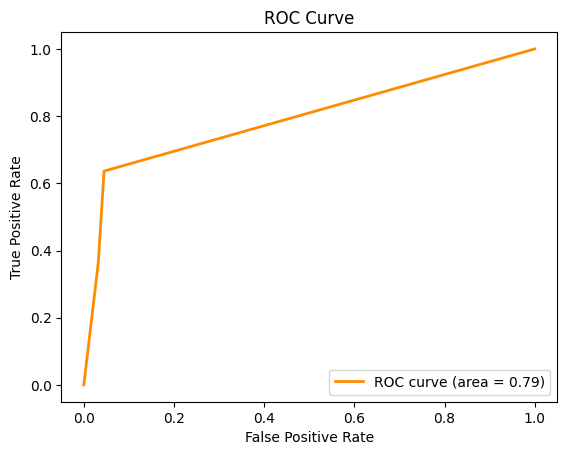

AUC =  0.7937062937062938


In [342]:
getAucRocMetrics(y_test.values, treeData1Mean.predict_proba(X_test.values)[:, 1], 1)

## Median

In [343]:
train_data = pd.read_csv('../../data/train1median.csv')
test_data = pd.read_csv('../../data/test1median.csv')

In [344]:
train_data.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,1.0,0.014000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.0,0.002667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [345]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [346]:
train_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,1.0,0.014000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.0,0.002667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.0,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [347]:
col_names = [*train_data.columns[:]]

In [348]:
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:,:-1], train_data.iloc[:,-1], test_size=0.1, random_state=42)
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [349]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [350]:
X_train = pd.concat([X_train, y_train], axis=1)
X_val = pd.concat([X_val, y_val], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [351]:
treeData1Median = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=10,
                    min_samples_at_leaf=1)

In [352]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((167, 28), (167,), (599, 28), (599,), (67, 28), (67,))

In [353]:
treeData1Median.fit(X_train.values, y_train.values)
print(treeData1Median.score(X_train.values, y_train.values))
print(treeData1Median.score(X_val.values, y_val.values))
print(treeData1Median.score(X_test.values, y_test.values))

0.9699499165275459
0.9402985074626866
0.9520958083832335


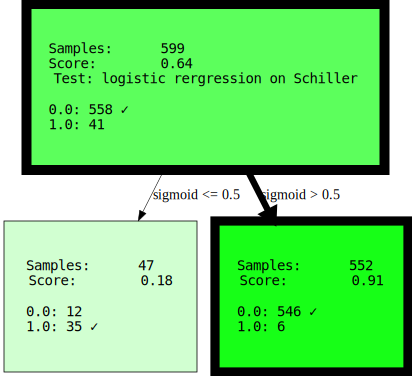

In [354]:
treeData1Median.generate_dot_graph()

In [355]:
preds = treeData1Median.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9520958083832335
Macro Precision =  0.7894736842105263
Micro Precision =  0.9520958083832335
Weighted Precision =  0.9722659943271352
Macro Recall =  0.9743589743589743
Micro Recall =  0.9520958083832335
Weighted Recall =  0.9520958083832335
Macro F1 =  0.8535087719298247
Micro F1 =  0.9520958083832335
Weighted F1 =  0.9578527156213887

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       156
         1.0       0.58      1.00      0.73        11

    accuracy                           0.95       167
   macro avg       0.79      0.97      0.85       167
weighted avg       0.97      0.95      0.96       167



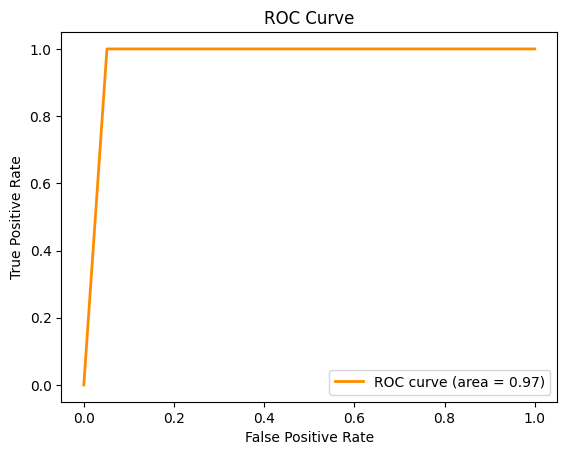

AUC =  0.9743589743589743


In [356]:
getAucRocMetrics(y_test.values, treeData1Median.predict_proba(X_test.values)[:, 1], 1)

In [357]:
treeData1Median = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=1)

In [358]:
treeData1Median.fit(X_train.values, y_train.values)
print(treeData1Median.score(X_train.values, y_train.values))
print(treeData1Median.score(X_val.values, y_val.values))
print(treeData1Median.score(X_test.values, y_test.values))

0.9666110183639399
0.9402985074626866
0.9341317365269461


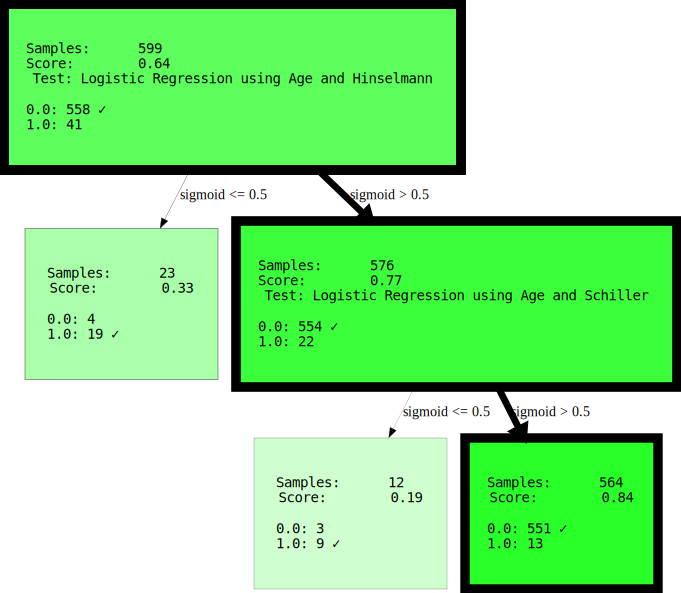

In [359]:
treeData1Median.generate_dot_graph()

In [360]:
preds = treeData1Median.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9341317365269461
Macro Precision =  0.7369281045751634
Micro Precision =  0.9341317365269461
Weighted Precision =  0.9426441235176705
Macro Recall =  0.7957459207459208
Micro Recall =  0.9341317365269461
Weighted Recall =  0.9341317365269461
Macro F1 =  0.762200647249191
Micro F1 =  0.9341317365269461
Weighted F1 =  0.9377640834835185

Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       156
         1.0       0.50      0.64      0.56        11

    accuracy                           0.93       167
   macro avg       0.74      0.80      0.76       167
weighted avg       0.94      0.93      0.94       167



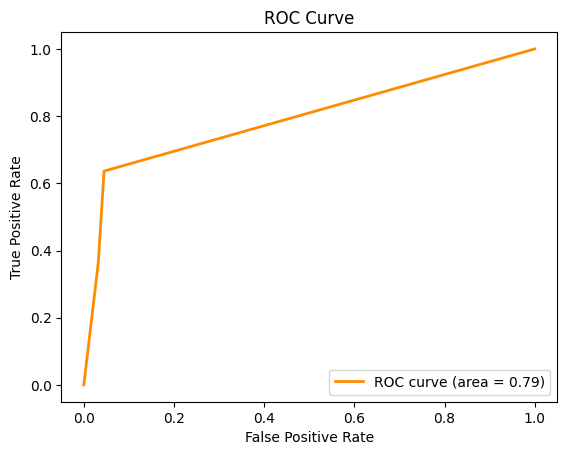

AUC =  0.7937062937062938


In [361]:
getAucRocMetrics(y_test.values, treeData1Median.predict_proba(X_test.values)[:, 1], 1)

# Dataset 2

In [316]:
train_data = pd.read_csv('../../data/train2.csv')
test_data = pd.read_csv('../../data/test2.csv')

In [317]:
train_data.head()

,Unnamed: 0,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,0.041667,...,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,1.0
1,1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,0.125000,...,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,1.0
2,2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,0.437500,...,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,1.0
3,3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,0.270833,...,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,1.0
4,4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,0.250000,...,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,1.0


In [318]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,0.637437,0.073030,0.112436,...,0.001669,0.003339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.000000,0.002667,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.000000,0.200000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
col_names = [*train_data.columns[:]]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:,:-1], train_data.iloc[:,-1], test_size=0.1, random_state=42)
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [ ]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [ ]:
X_train = pd.concat([X_train, y_train], axis=1)
X_val = pd.concat([X_val, y_val], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
treeData1Mean = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=1)

In [ ]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((167, 28), (167,), (599, 28), (599,), (67, 28), (67,))

In [ ]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_val.values, y_val.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.9699499165275459
0.9402985074626866
0.9520958083832335


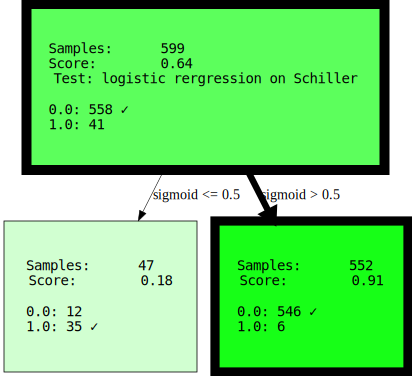

In [ ]:
treeData1Mean.generate_dot_graph()

In [ ]:
preds = treeData1Mean.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9520958083832335
Macro Precision =  0.7894736842105263
Micro Precision =  0.9520958083832335
Weighted Precision =  0.9722659943271352
Macro Recall =  0.9743589743589743
Micro Recall =  0.9520958083832335
Weighted Recall =  0.9520958083832335
Macro F1 =  0.8535087719298247
Micro F1 =  0.9520958083832335
Weighted F1 =  0.9578527156213887

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       156
         1.0       0.58      1.00      0.73        11

    accuracy                           0.95       167
   macro avg       0.79      0.97      0.85       167
weighted avg       0.97      0.95      0.96       167



In [ ]:
treeData1Mean.predict_proba(X_test.values)

array([[0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.25531915, 0.74468085],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.25531915, 0.74468085],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.25531915, 0.74468085],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.98913043, 0.01086957],
       [0.

In [ ]:
f, t, _ = roc_curve(y_test.values, treeData1Mean.predict_proba(X_test.values)[:,1], pos_label=1)

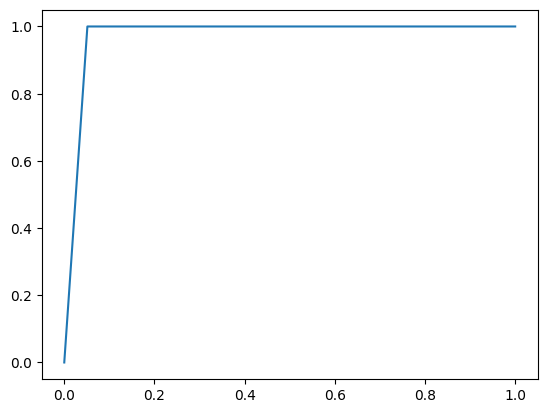

In [ ]:
plt.plot(f, t)

In [ ]:
roc_auc_score(y_test.values, treeData1Mean.predict_proba(X_test.values)[:,1])

0.9743589743589743

In [ ]:
treeData1Mean = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [ ]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_val.values, y_val.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.9666110183639399
0.9402985074626866
0.9341317365269461


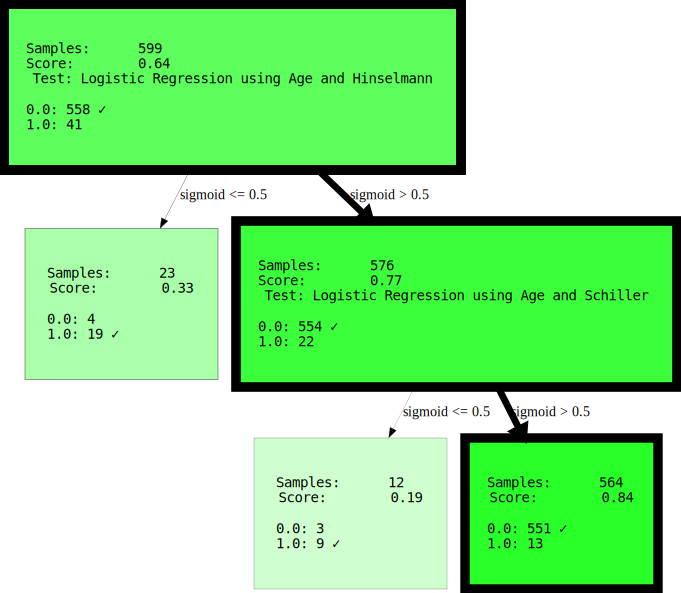

In [ ]:
treeData1Mean.generate_dot_graph()

In [ ]:
preds = treeData1Mean.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9341317365269461
Macro Precision =  0.7369281045751634
Micro Precision =  0.9341317365269461
Weighted Precision =  0.9426441235176705
Macro Recall =  0.7957459207459208
Micro Recall =  0.9341317365269461
Weighted Recall =  0.9341317365269461
Macro F1 =  0.762200647249191
Micro F1 =  0.9341317365269461
Weighted F1 =  0.9377640834835185

Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       156
         1.0       0.50      0.64      0.56        11

    accuracy                           0.93       167
   macro avg       0.74      0.80      0.76       167
weighted avg       0.94      0.93      0.94       167



# Dataset 3

## Simple 

In [362]:
train_data = pd.read_csv('../../data/train3simple.csv')
test_data = pd.read_csv('../../data/test3simple.csv')

In [363]:
train_data.head()

,Unnamed: 0,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0,0.389610,0.038616,0.029412,1.0,0.0,0.389322,0.368201,0.877883,0,0,0,0,0,0,0,0,0,0,0
1,1,0.220779,0.523733,0.058824,1.0,0.0,0.269680,0.192469,0.512287,1,1,0,0,1,1,1,1,1,0,1
2,2,0.246753,0.472245,0.000000,1.0,0.0,0.340608,0.154812,0.512287,1,1,0,0,0,1,0,2,2,0,1
3,3,0.545455,0.055511,0.029412,1.0,0.0,0.484412,0.615063,1.000000,2,1,1,0,0,0,0,3,0,0,0
4,4,0.220779,0.106999,0.000000,1.0,0.0,0.250195,0.033473,0.512287,2,2,1,0,1,1,0,4,3,0,1


In [364]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [365]:
train_data.head()

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0.389610,0.038616,0.029412,1.0,0.0,0.389322,0.368201,0.877883,0,0,0,0,0,0,0,0,0,0,0
1,0.220779,0.523733,0.058824,1.0,0.0,0.269680,0.192469,0.512287,1,1,0,0,1,1,1,1,1,0,1
2,0.246753,0.472245,0.000000,1.0,0.0,0.340608,0.154812,0.512287,1,1,0,0,0,1,0,2,2,0,1
3,0.545455,0.055511,0.029412,1.0,0.0,0.484412,0.615063,1.000000,2,1,1,0,0,0,0,3,0,0,0
4,0.220779,0.106999,0.000000,1.0,0.0,0.250195,0.033473,0.512287,2,2,1,0,1,1,0,4,3,0,1


In [366]:
col_names = [*train_data.columns[:]]

In [367]:
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:,:-1], train_data.iloc[:,-1], test_size=0.1, random_state=42)
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [368]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [369]:
X_train = pd.concat([X_train, y_train], axis=1)
X_val = pd.concat([X_val, y_val], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [370]:
treeData3Simple = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [371]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((8230, 19), (8230,), (29626, 19), (29626,), (3292, 19), (3292,))

In [372]:
treeData3Simple.fit(X_train.values, y_train.values)
print(treeData3Simple.score(X_train.values, y_train.values))
print(treeData3Simple.score(X_val.values, y_val.values))
print(treeData3Simple.score(X_test.values, y_test.values))

0.9073448997502194
0.9037059538274606
0.9038882138517619


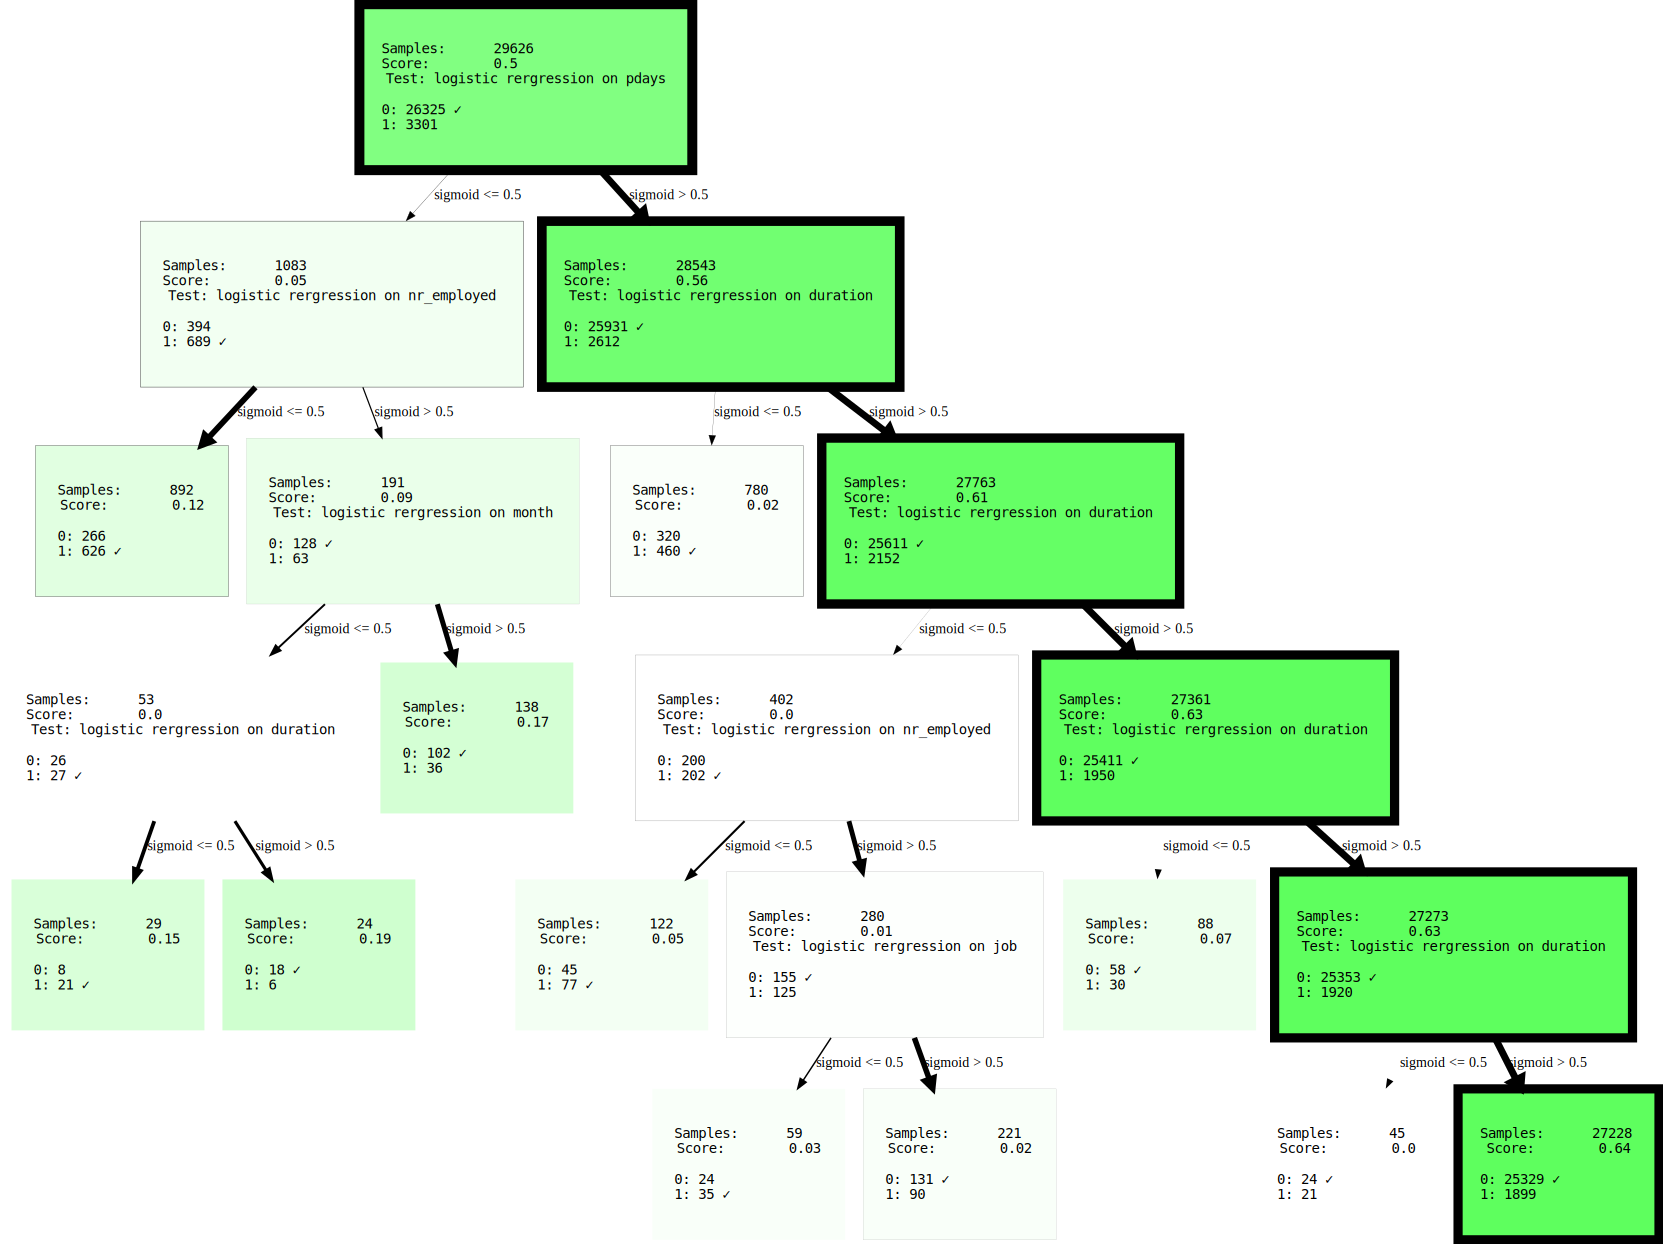

In [373]:
treeData3Simple.generate_dot_graph()

In [374]:
preds = treeData3Simple.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9038882138517619
Macro Precision =  0.7812902242109062
Micro Precision =  0.9038882138517619
Weighted Precision =  0.8891479912166673
Macro Recall =  0.6589422171045745
Micro Recall =  0.9038882138517619
Weighted Recall =  0.9038882138517619
Macro F1 =  0.6969207421527118
Micro F1 =  0.9038882138517619
Weighted F1 =  0.8906503296892729

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7298
           1       0.64      0.34      0.45       932

    accuracy                           0.90      8230
   macro avg       0.78      0.66      0.70      8230
weighted avg       0.89      0.90      0.89      8230



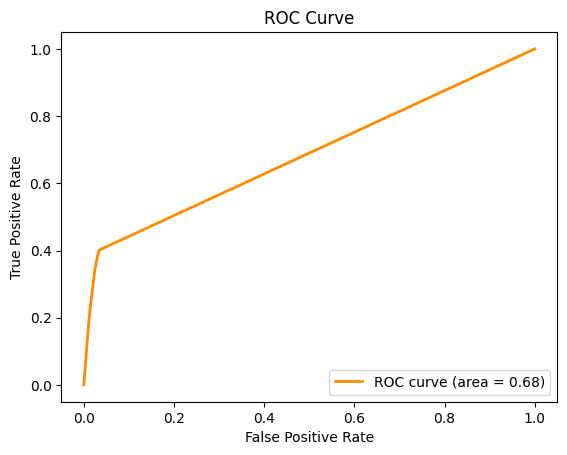

AUC =  0.6849927724333905


In [380]:
getAucRocMetrics(y_test.values, treeData3Simple.predict_proba(X_test.values)[:, 1], 1)

In [381]:
treeData3Simple = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [382]:
treeData3Simple.fit(X_train.values, y_train.values)
print(treeData3Simple.score(X_train.values, y_train.values))
print(treeData3Simple.score(X_val.values, y_val.values))
print(treeData3Simple.score(X_test.values, y_test.values))

0.8958684938905016
0.8873025516403402
0.8922235722964763


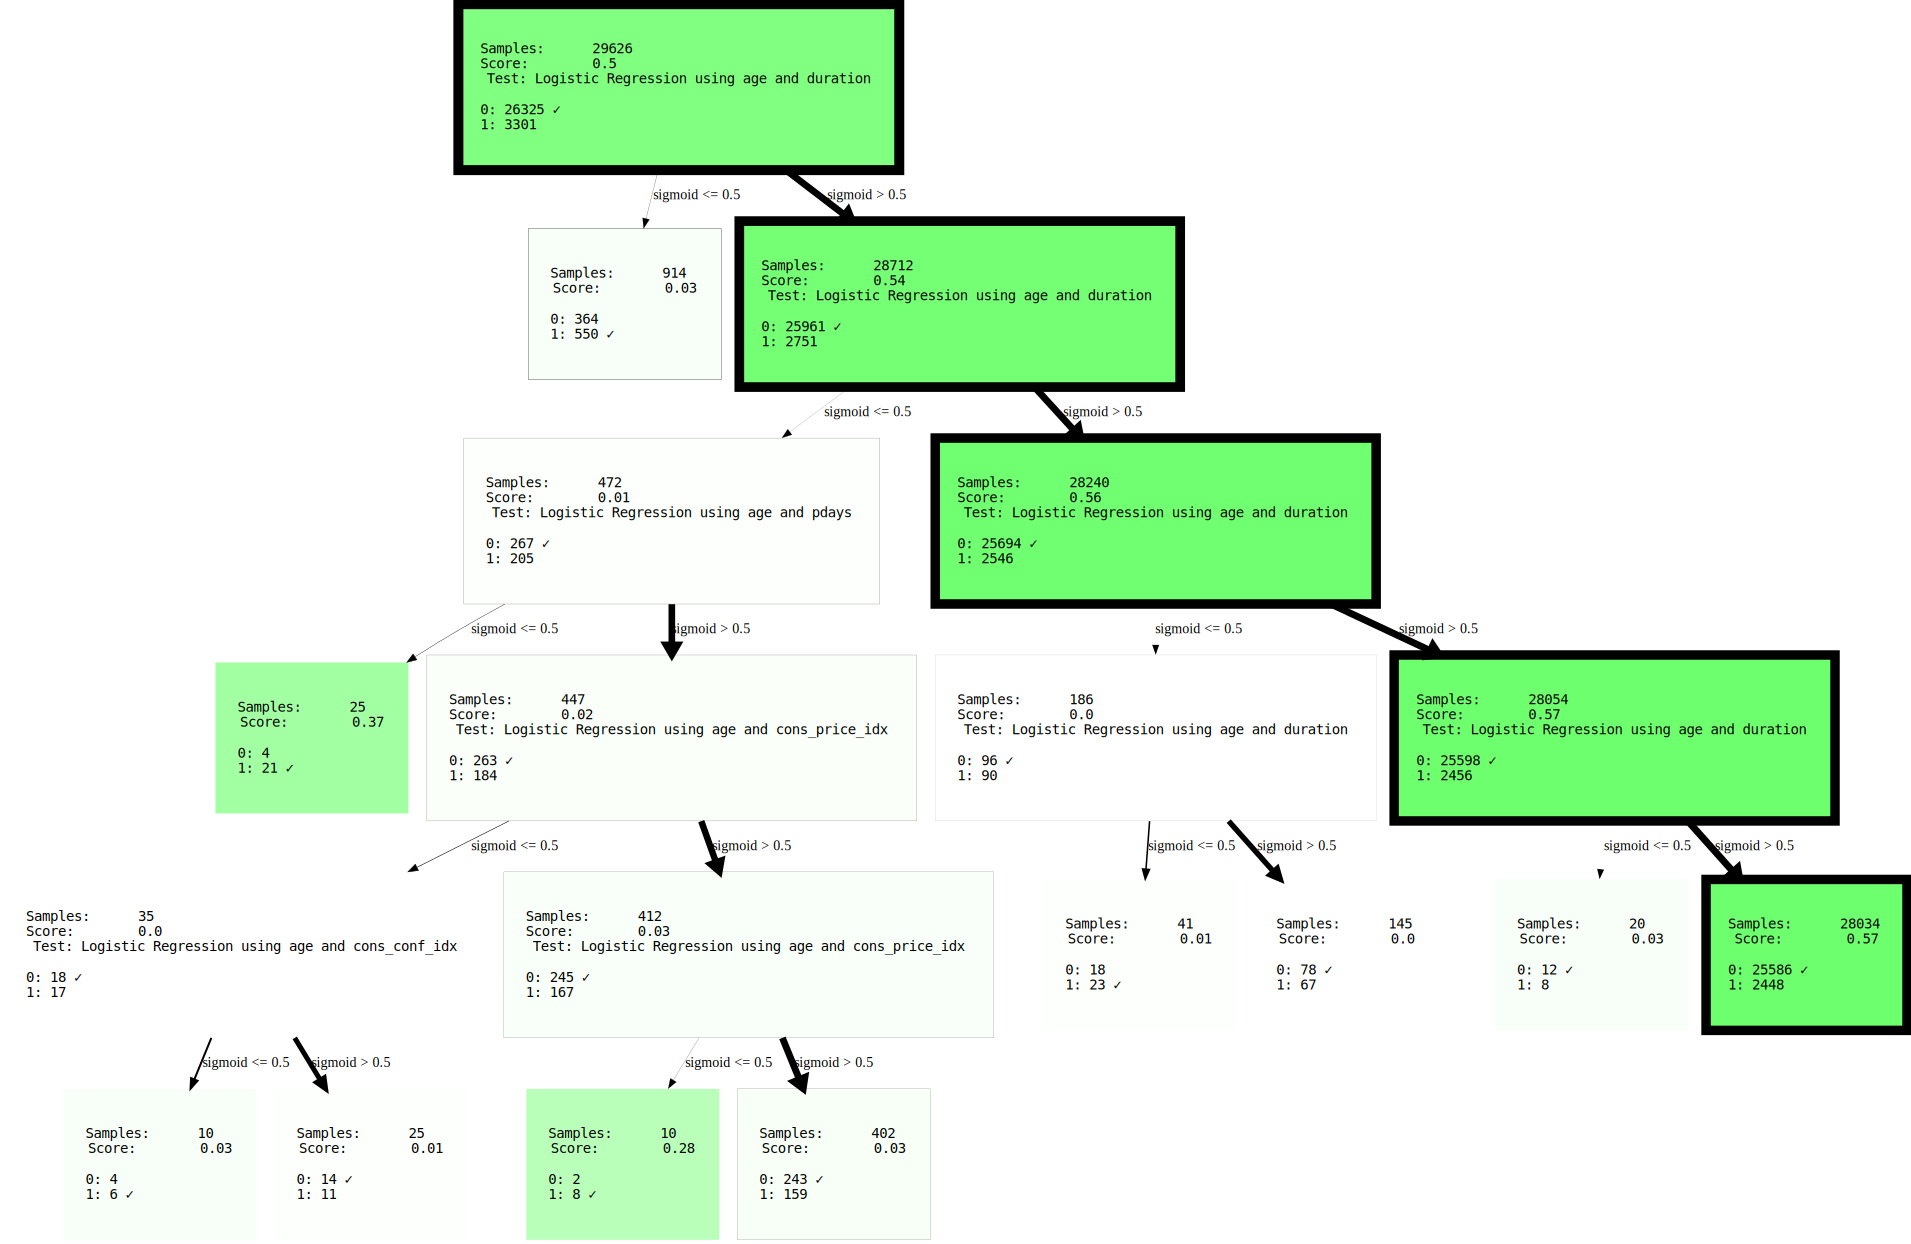

In [383]:
treeData3Simple.generate_dot_graph()

In [384]:
preds = treeData3Simple.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.8922235722964763
Macro Precision =  0.7456917536022099
Micro Precision =  0.8922235722964763
Weighted Precision =  0.8663984769210116
Macro Recall =  0.5723424137602517
Micro Recall =  0.8922235722964763
Weighted Recall =  0.8922235722964763
Macro F1 =  0.5960750947382435
Micro F1 =  0.8922235722964763
Weighted F1 =  0.8636047113319302

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7298
           1       0.59      0.16      0.25       932

    accuracy                           0.89      8230
   macro avg       0.75      0.57      0.60      8230
weighted avg       0.87      0.89      0.86      8230



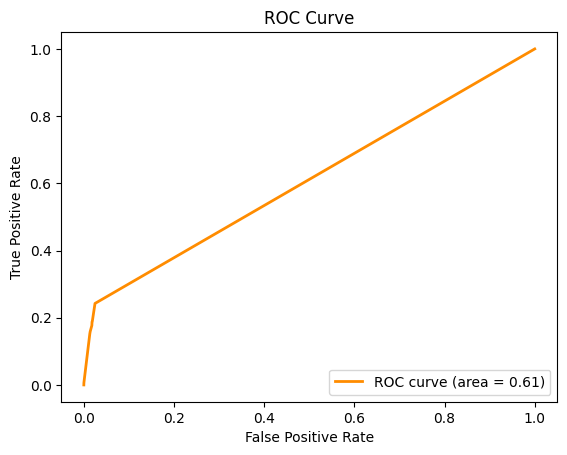

AUC =  0.6091063369704439


In [385]:
getAucRocMetrics(y_test.values, treeData3Simple.predict_proba(X_test.values)[:, 1], 1)

## OneHot 

In [386]:
train_data = pd.read_csv('../../data/train3onehot.csv')
test_data = pd.read_csv('../../data/test3onehot.csv')

In [387]:
train_data.head()

,Unnamed: 0,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,...,onehotencoder__poutcome_success,remainder__age,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous,remainder__cons_price_idx,remainder__cons_conf_idx,remainder__nr_employed,remainder__y
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.389610,0.038616,0.029412,1.0,0.0,0.389322,0.368201,0.877883,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.220779,0.523733,0.058824,1.0,0.0,0.269680,0.192469,0.512287,1.0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.246753,0.472245,0.000000,1.0,0.0,0.340608,0.154812,0.512287,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.545455,0.055511,0.029412,1.0,0.0,0.484412,0.615063,1.000000,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.220779,0.106999,0.000000,1.0,0.0,0.250195,0.033473,0.512287,1.0


In [388]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [389]:
train_data.head()

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,...,onehotencoder__poutcome_success,remainder__age,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous,remainder__cons_price_idx,remainder__cons_conf_idx,remainder__nr_employed,remainder__y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.389610,0.038616,0.029412,1.0,0.0,0.389322,0.368201,0.877883,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.220779,0.523733,0.058824,1.0,0.0,0.269680,0.192469,0.512287,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.246753,0.472245,0.000000,1.0,0.0,0.340608,0.154812,0.512287,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.545455,0.055511,0.029412,1.0,0.0,0.484412,0.615063,1.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.220779,0.106999,0.000000,1.0,0.0,0.250195,0.033473,0.512287,1.0


In [390]:
col_names = [*train_data.columns[:]]

In [391]:
X_train, X_val, y_train, y_val = train_test_split(train_data.iloc[:,:-1], train_data.iloc[:,-1], test_size=0.1, random_state=42)
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [392]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [393]:
X_train = pd.concat([X_train, y_train], axis=1)
X_val = pd.concat([X_val, y_val], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [394]:
treeData3OHT = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [395]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((8230, 56), (8230,), (29626, 56), (29626,), (3292, 56), (3292,))

In [396]:
treeData3OHT.fit(X_train.values, y_train.values)
print(treeData3OHT.score(X_train.values, y_train.values))
print(treeData3OHT.score(X_val.values, y_val.values))
print(treeData3OHT.score(X_test.values, y_test.values))

0.9070411125362857
0.9037059538274606
0.9034021871202916


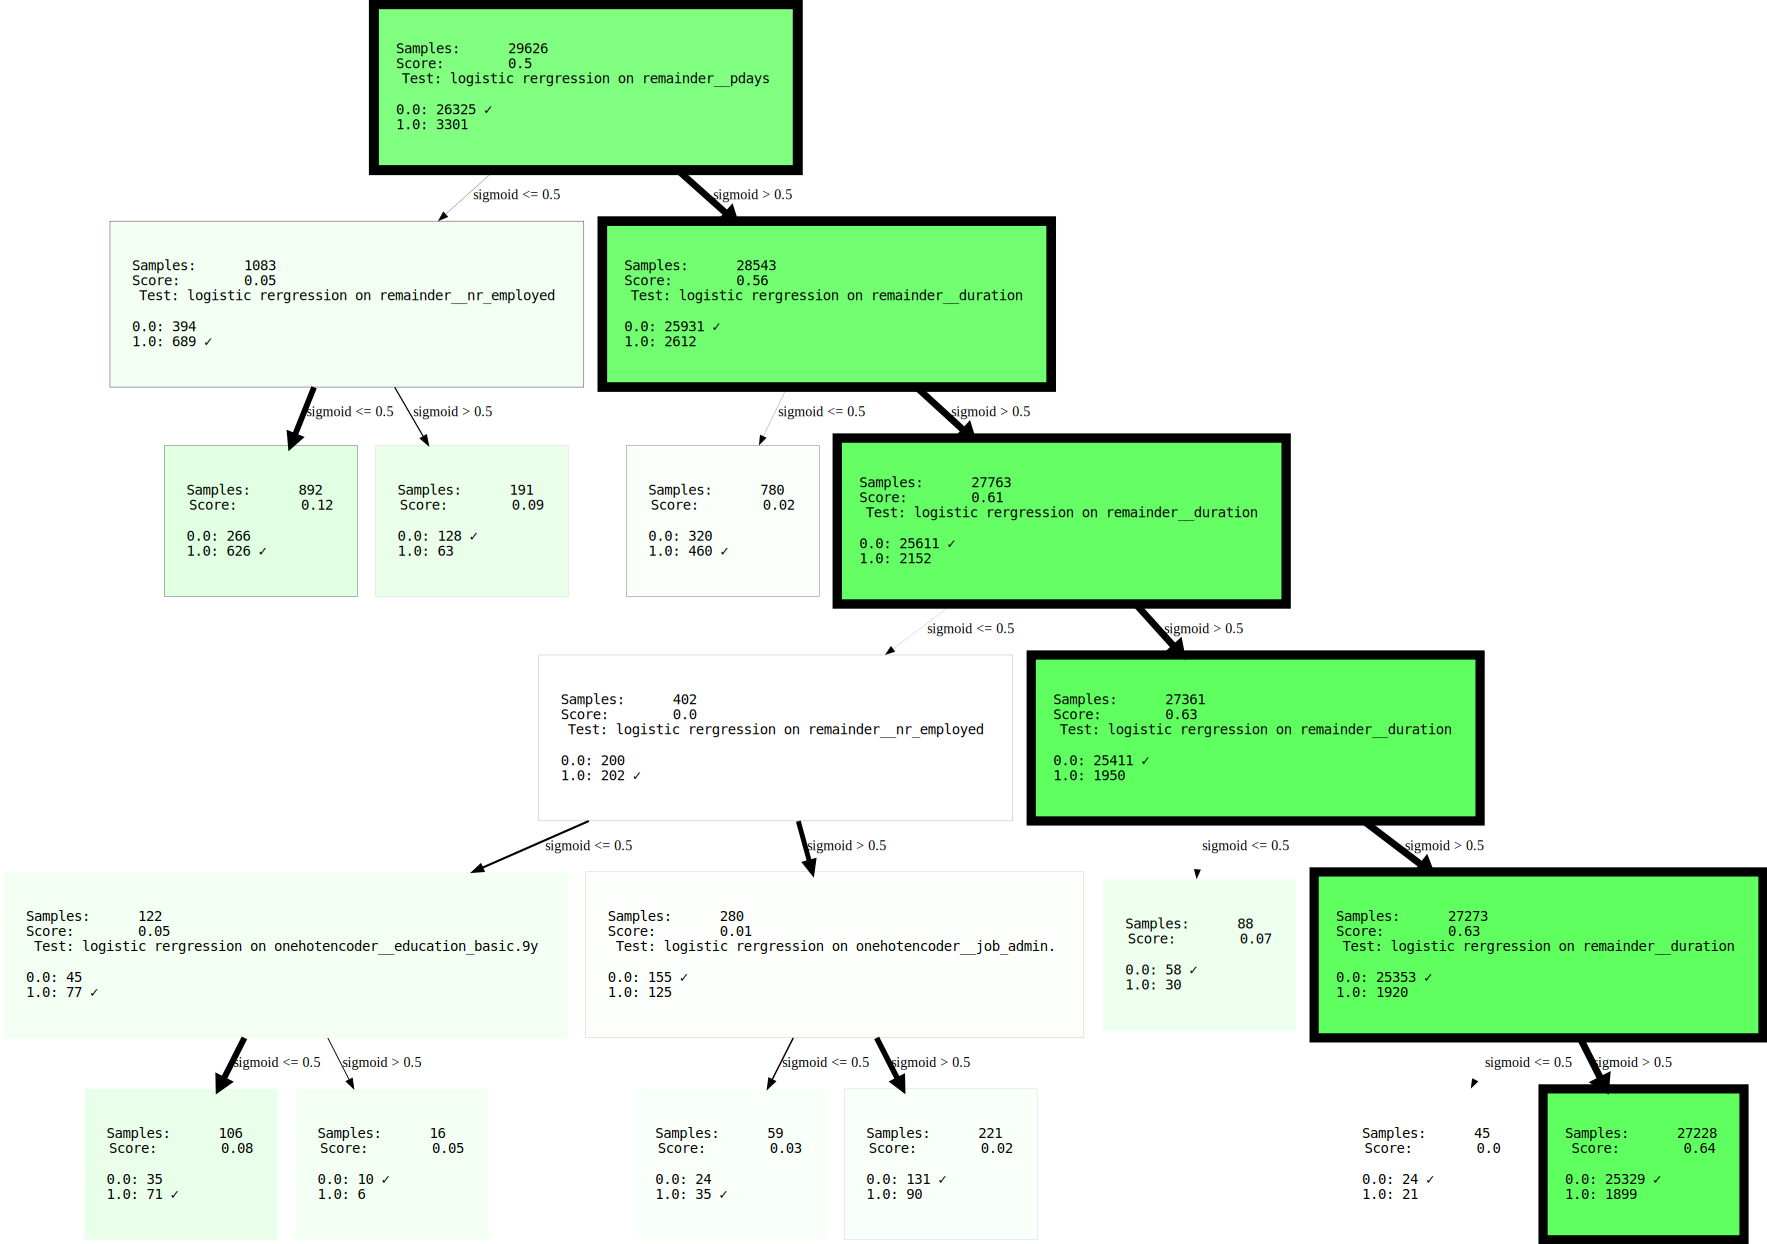

In [397]:
treeData3OHT.generate_dot_graph()

In [398]:
preds = treeData3OHT.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9034021871202916
Macro Precision =  0.7802923804000221
Micro Precision =  0.9034021871202916
Weighted Precision =  0.8883018938483731
Macro Recall =  0.6553923880609303
Micro Recall =  0.9034021871202916
Weighted Recall =  0.9034021871202916
Macro F1 =  0.6934453859942795
Micro F1 =  0.9034021871202916
Weighted F1 =  0.8896845573300881

Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7298
         1.0       0.64      0.33      0.44       932

    accuracy                           0.90      8230
   macro avg       0.78      0.66      0.69      8230
weighted avg       0.89      0.90      0.89      8230



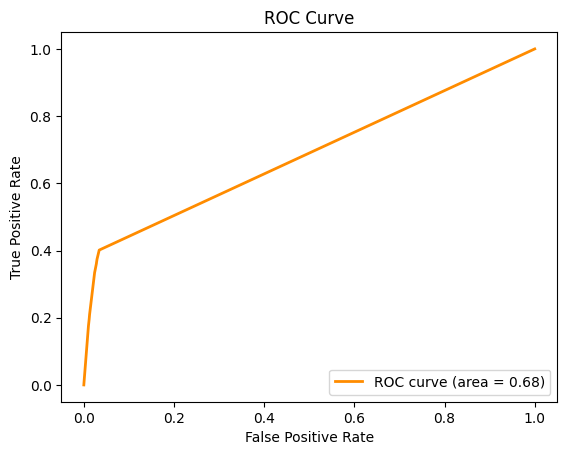

AUC =  0.6849196293416857


In [399]:
getAucRocMetrics(y_test.values, treeData3OHT.predict_proba(X_test.values)[:, 1], 1)

In [400]:
treeData3OHT = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [401]:
treeData3OHT.fit(X_train.values, y_train.values)
print(treeData3OHT.score(X_train.values, y_train.values))
print(treeData3OHT.score(X_val.values, y_val.values))
print(treeData3OHT.score(X_test.values, y_test.values))

0.9047120772294606
0.9037059538274606
0.9015795868772782


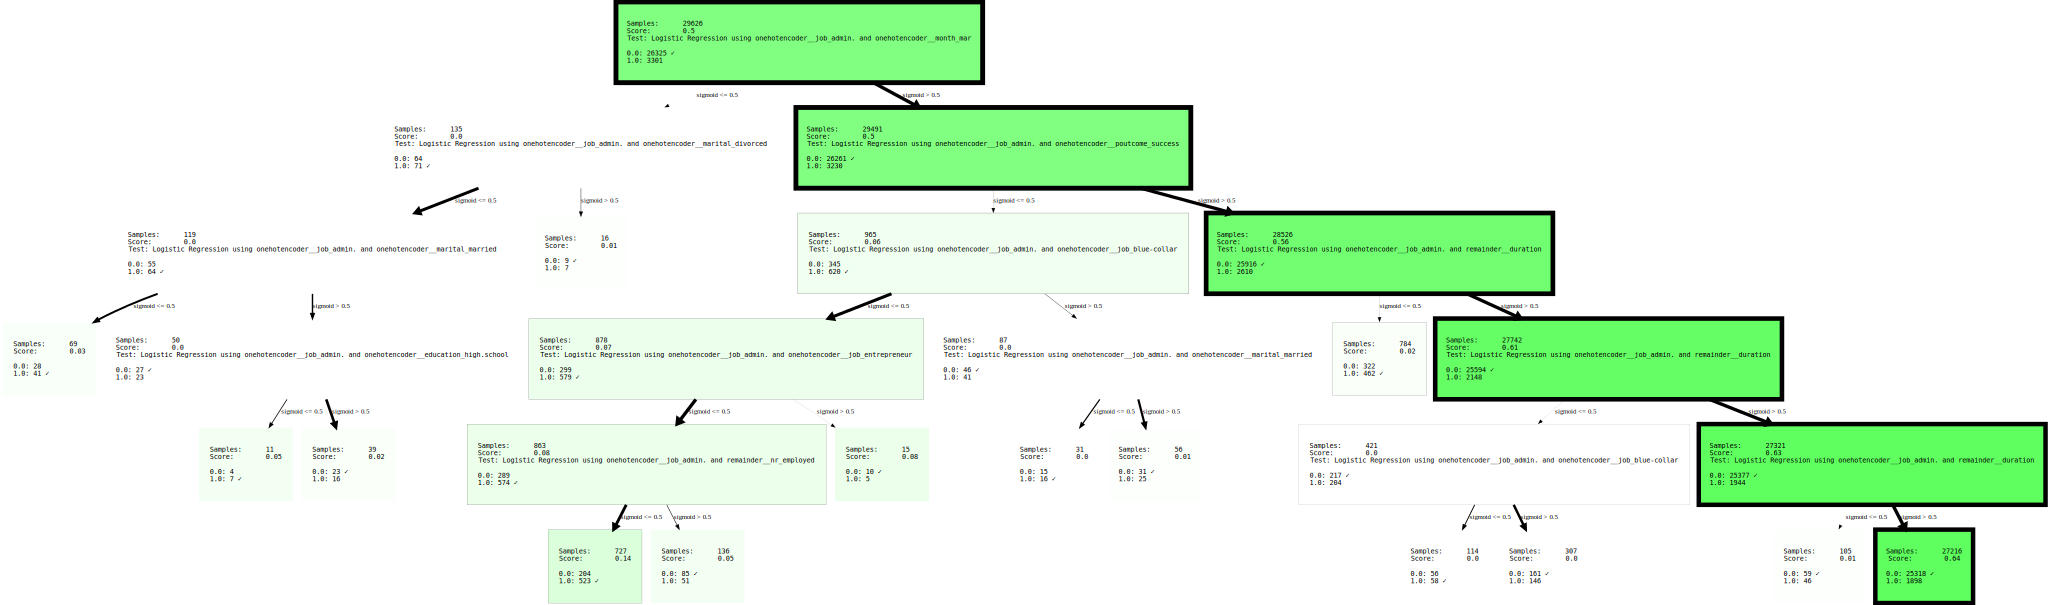

In [402]:
treeData3OHT.generate_dot_graph()

In [403]:
preds = treeData3OHT.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9015795868772782
Macro Precision =  0.7755301635230345
Micro Precision =  0.9015795868772782
Weighted Precision =  0.8851817936232143
Macro Recall =  0.6436014276355331
Micro Recall =  0.9015795868772782
Weighted Recall =  0.9015795868772782
Macro F1 =  0.6813422373758695
Micro F1 =  0.9015795868772782
Weighted F1 =  0.8862576081630614

Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7298
         1.0       0.63      0.31      0.42       932

    accuracy                           0.90      8230
   macro avg       0.78      0.64      0.68      8230
weighted avg       0.89      0.90      0.89      8230



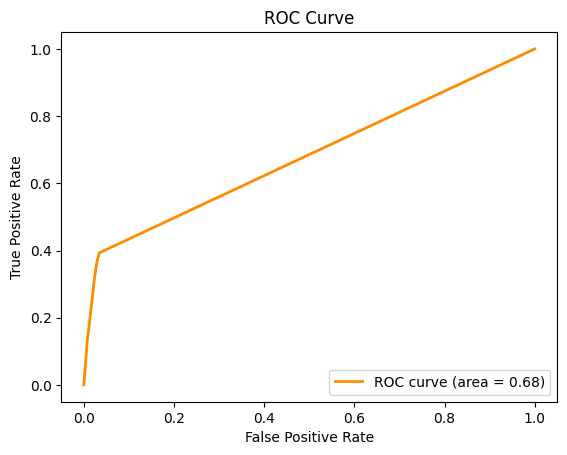

AUC =  0.6805286179881137


In [404]:
getAucRocMetrics(y_test.values, treeData3OHT.predict_proba(X_test.values)[:, 1], 1)